# What Does Success Look Like in the NBA?

In this report, we explore the multifaceted definition of success in the NBA by analyzing statistics from thousands of individuals involved in the league. From players to coaches, executives to support staff, each role contributes to the broader ecosystem of basketball excellence. By examining performance metrics, career trajectories, and organizational strategies, we aim to uncover the key factors that define and drive success at every level of the NBA.

## Why This Data?

The game of basketball is known to be ever-changing. We wanted to explore how the NBA statistics have evolved over the years and whether modern changes to playstyles have had any impact on the outcomes. With the introduction of more analytical approaches to the game, such as player efficiency, three-point shooting, and advanced metrics, we aimed at understanding how these changes have influenced the success of teams and players in recent decades.

The data set we've chosen spans multiple years of NBA statistics, capturing three different levels of "success". The first includes all NBA players stats from 1946-current. The second includes all all-star nominees for this time period and their respective stats. Lastly, we have a hall of fame data set that includes both players, coaches, and more that are considered the best of the best. By analyzing this data, we can assess the differences in these three stages of "success" and explore how various performance indicators correlate with success.

## Motivation and Background

Our motivation for this analysis stems from the desire to break down why certain players are considered for a given accolade. The various components of success in the NBA can help us develop an understanding of how different factors, such as player performance or coaching legacy, play a role in the grand scheme of things.

## Key Topics and Specific Questions

The key topics and specific questions we aim to address through our analysis are:

- **Is there a difference in statistical measures among the three levels of success?**  
  Do stats improve drastically as the level of success increases? Do certain stats, like three-point shooting, show improvement over time?
  
- **What measures correlate to the HOF for the NBA?**  
  We will explore which stats like points per game (PPG) and rebounds per game (TRB) help contribute to a player's hall of fame nomination.

- **Does age play a role in the output of players?**  
  Are certain ages better at producing in the NBA?

- **What other measures of success are there in the NBA?**  
  Is there a way to be successful in the NBA without playing?


----------------------------------------------------------------------------------------------------------------------------

In [1]:
# Install packages
# !pip install seaborn

In [2]:
## Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

------------------------------------------------------------------------------------------------------------------------------

## HALL OF FAME DATASET ##

In [3]:
# read csv
hofdf = pd.read_csv('NBA_Statistics - Hall_of_Fame.csv')
# preview of data
hofdf.head()

,Year,Name,Contribution_Type,Inductee_Type,Games,Points_PG,TRB_PG,AST_PG,STL_PG,BLK_PG,FG%,3P%,FT%,Games_Coached,Wins_Coached,Losses_Coached,Win_Loss
0,2024,Seimone Augustus,WNBA / Int'l / CBB player,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,Dick Barnett,Player / Coach,Player,971.0,15.8,2.9,2.8,0.2,0.0,0.456,NaN,0.761,NaN,NaN,NaN,NaN
2,2024,Chauncey Billups,Player / Coach / Int'l / CBB player,Player,1043.0,15.2,2.9,5.4,1.0,0.2,0.415,0.387,0.894,NaN,NaN,NaN,NaN
3,2024,Vince Carter,Player / Int'l / CBB player,Player,1541.0,16.7,4.3,3.1,1.0,0.6,0.435,0.371,0.798,NaN,NaN,NaN,NaN
4,2024,Doug Collins,Player / Coach / Exec / Int'l / CBB player,Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(hofdf)

473

In [5]:
# 1. How many players are in the dataset?
players = hofdf[hofdf['Inductee_Type'] == 'Player']
len(players)

236

In [6]:
# How many coaches are in the dataset?
coaches = hofdf[hofdf['Inductee_Type'] == 'Coach']
len(coaches)

123

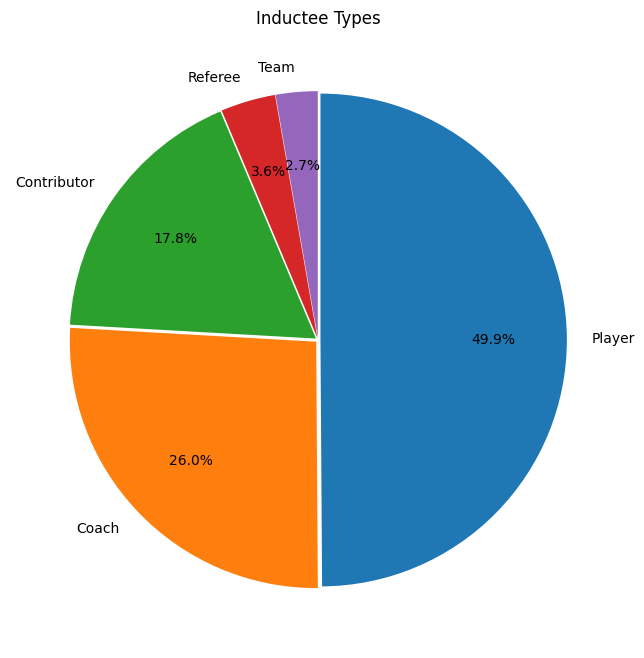

In [7]:
plt.style.use("default")
fig, ax = plt.subplots(figsize=(8, 8))

# Count of inductee types
inductee_counts = hofdf['Inductee_Type'].value_counts()
# Labels and explodes
explodes = [0.01] * len(inductee_counts)
labels = inductee_counts.index

# Pie chart
ax.pie(
    inductee_counts, 
    labels=labels, 
    explode=explodes, 
    autopct='%.1f%%', 
    pctdistance=0.7, 
    startangle=90, 
    counterclock=False
)
ax.set_title('Inductee Types')
plt.show()

In [8]:
# Who has coached the most games?

# Filter to the coach w/ highest games_coached value
most_games_coached = hofdf.loc[hofdf['Games_Coached'].idxmax()]
# Grab name of coach
most_games_coached_name = most_games_coached['Name']
# Grab number of games
most_games_coached_games = most_games_coached['Games_Coached']

print(f"{most_games_coached_name} coached the most games: {most_games_coached_games} games")

Lenny Wilkens  coached the most games: 2487.0 games


In [9]:
# Who has the highest win-loss ratio as a coach?

hofdf['Win_Loss_Ratio'] = hofdf['Wins_Coached'] / hofdf['Losses_Coached']
# Take the name with the max value
hofdf.loc[hofdf['Win_Loss_Ratio'].idxmax()]['Name']

'Phil Jackson '

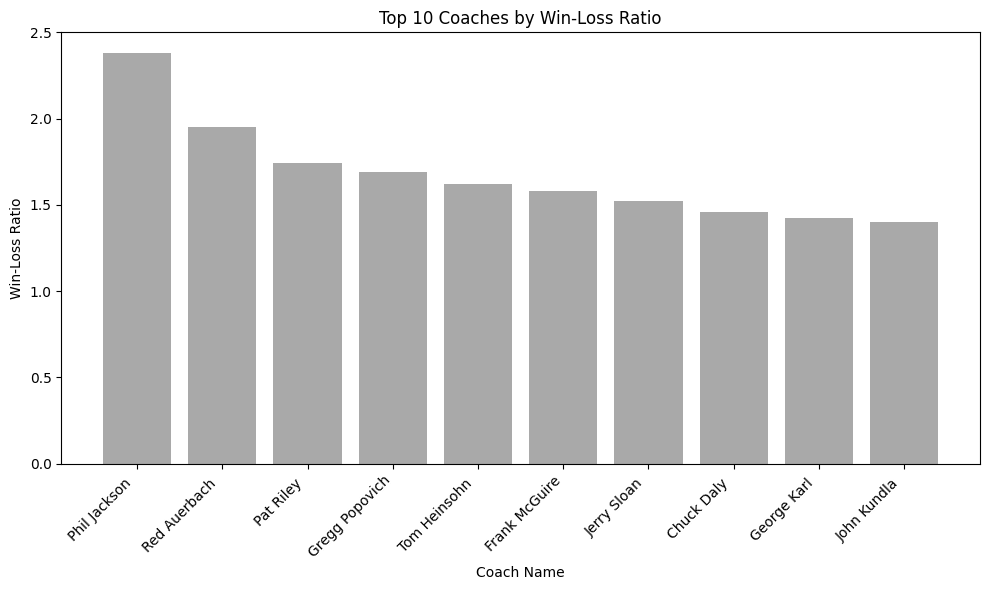

In [10]:
# Highest Win-Loss Ratio Coach

# Construct variables
hofdf['Win_Loss_Ratio'] = hofdf['Wins_Coached'] / hofdf['Losses_Coached']
top_10_coaches = hofdf.nlargest(10, 'Win_Loss_Ratio')
coach_names = top_10_coaches['Name']
win_loss_ratios = top_10_coaches['Win_Loss_Ratio']

# Plot top 10
plt.figure(figsize=(10, 6))
plt.bar(coach_names, win_loss_ratios, color='darkgray')
plt.title('Top 10 Coaches by Win-Loss Ratio')
plt.xlabel('Coach Name')
plt.ylabel('Win-Loss Ratio')
plt.xticks(rotation=45, ha='right')  # Rotates x axis so it can be read better
plt.tight_layout()  # Automatically adjusts subplot
plt.show()

## ALL STAR DATASET ##

In [11]:
all_star = pd.read_csv('NBA_all_star_history - 1950_2024-2.csv')
per_game = pd.read_csv('NBA_Statistics - Per_Game.csv')

# Need to use first year from 'yyyy-yyyy'
def extract_year(year):
    if isinstance(year, str) and '-' in year:
        return int(year.split('-')[0])  # Take the first part of the range
    else:
        return pd.to_numeric(year, errors='coerce')  # Convert directly if it's a valid year

# Use our new function with the 'Year' column
all_star['Year'] = all_star['Year'].apply(extract_year)

# Take starting year from the 'Season' in per_game df
per_game['Year'] = per_game['Season'].str[:4].astype(int)

# Left join on 'Player' and 'Year'
asdf = all_star.merge(per_game, how='left', on=['Player', 'Year'])

asdf.head()

,Player,Pos,Team_x,Selection_Type,Conference,Year,Season,POS,Age,Years_Exp,...,FT_Percent,ORB,DRB,TRB,AST,STL,BLK,TOV,Personal_Fouls,Points
0,Bam Adebayo,C,Miami Heat,Eastern All-Star Coaches Selection,East,2023,2023-24,C,26.0,7.0,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
1,Giannis Antetokounmpo,PF,Milwaukee Bucks,Eastern All-Star Fan Vote Selection,East,2023,2023-24,PF,29.0,11.0,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4
2,Paolo Banchero,C,Orlando Magic,Eastern All-Star Coaches Selection,East,2023,2023-24,PF,21.0,2.0,...,0.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6
3,Scottie Barnes,SF,Toronto Raptors,Eastern All-Star Replacement Selection,East,2023,2023-24,SG,22.0,3.0,...,0.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9
4,Jaylen Brown,SF,Boston Celtics,Eastern All-Star Coaches Selection,East,2023,2023-24,SF,27.0,8.0,...,0.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0


In [12]:
# 1. How many entries? (How many all-star nominees total?)
entries = asdf.shape[0]
entries

1860

In [13]:
# 2. How many unique players?
unique_players = asdf['Player'].nunique()
unique_players

454

In [14]:
# 3. What is the average ppg for all all-stars?
avg_ppg = asdf['Points'].mean()
avg_ppg

20.889598238855257

In [15]:
# What all-star player had the highest ppg average?

highest_pts = asdf.loc[asdf['Points'].idxmax()]
# Grab player name
highest_pts_player = highest_pts['Player']
# Grab points scored in all-star game
highest_pts_total = highest_pts['Points']

print(f"{highest_pts_player} averaged the most points for a season: {highest_pts_total} points")


Wilt Chamberlain averaged the most points for a season: 50.4 points


In [16]:
# How many all-stars from given team?
team_count = asdf[asdf['Team_x'] == 'Boston Celtics'].shape[0]
team_count

154

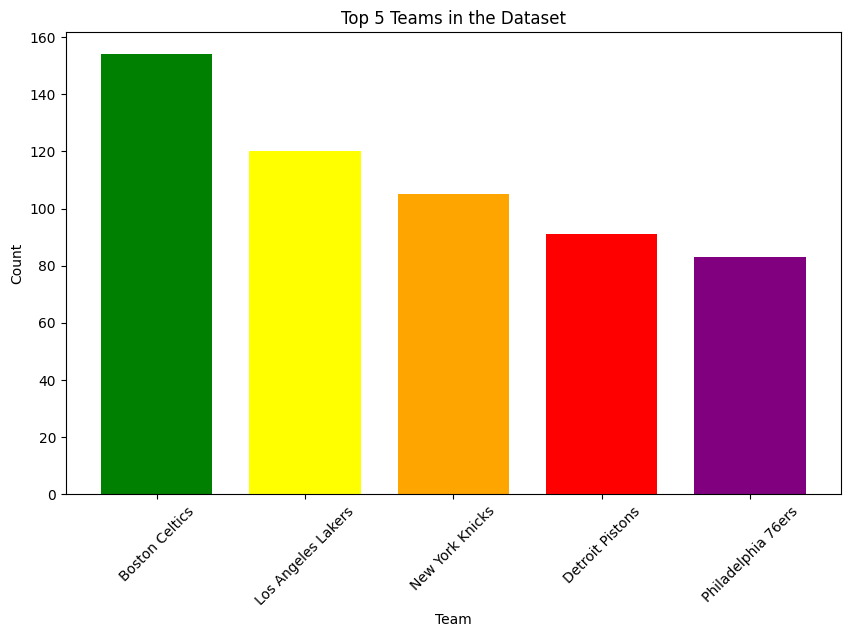

In [17]:
# Group by team and count the entries
team_counts = asdf['Team_x'].value_counts()
# Top 5 teams
top_5_teams = team_counts.head(5)

# Set the style to default
plt.style.use("default")

# Bar chart for the top 5 teams
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_5_teams.index, top_5_teams.values, color=['green', 'yellow', 'orange', 'red', 'purple'], width=0.75)
ax.set_title('Top 5 Teams in the Dataset')
ax.set_xlabel('Team')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

plt.show()

### HIGH SCHOOL DATASET ###

In [18]:
hsdf = pd.read_csv('NBA_Players_High_School - State.csv')
hsdf.head()

,State,Player,HS City,HS Name,Years,From,To,Games,Career_Min_Played,Career_FG,...,Career_Personal_Fouls,Career_Points,Career_FG%,Career_3P%,Career_FT%,Min_Played_PG,Points_PG,TRB_PG,AST_PG,Unnamed: 30
0,Alabama,Michael Ansley,Birmingham,Jackson-Olin,3.0,1990,1992,149,2143.0,383,...,284.0,1026,0.513,NaN,0.722,14.4,6.9,4.2,0.4,NaN
1,Alabama,Keith Askins,Athens,Athens,9.0,1991,1999,486,7983.0,677,...,1094.0,1852,0.401,0.355,0.717,16.4,3.8,2.9,0.8,NaN
2,Alabama,Carl Bailey,Birmingham,Jackson-Olin,1.0,1982,1982,1,7.0,1,...,2.0,2,1.000,NaN,NaN,7.0,2.0,0.0,0.0,NaN
3,Alabama,Charles Barkley*,Leeds,Leeds,16.0,1985,2000,1073,39330.0,8435,...,3287.0,23757,0.541,0.266,0.735,36.7,22.1,11.7,3.9,NaN
4,Alabama,Eric Bledsoe,Birmingham,A.H. Parker,12.0,2011,2022,756,21021.0,3689,...,1493.0,10348,0.452,0.336,0.784,27.8,13.7,3.9,4.7,NaN


In [19]:
# 1. How many entries in the high school dataset?
count_hsdf = hsdf.shape[0]
count_hsdf

4566

In [20]:
# 2. What is the mean number of career points across all players?
mean_career_points = hsdf['Career_Points'].mean()
total_career_points = hsdf['Career_Points'].sum()
print(f"Average: {mean_career_points}, Total: {total_career_points}")

Average: 2906.1147612790187, Total: 13269320


In [21]:
# Add a binary variable to indicate if a player is in the Hall of Fame
hsdf['HOF'] = hsdf['Player'].apply(lambda player: 1 if player in hofdf['Name'].values else 0)

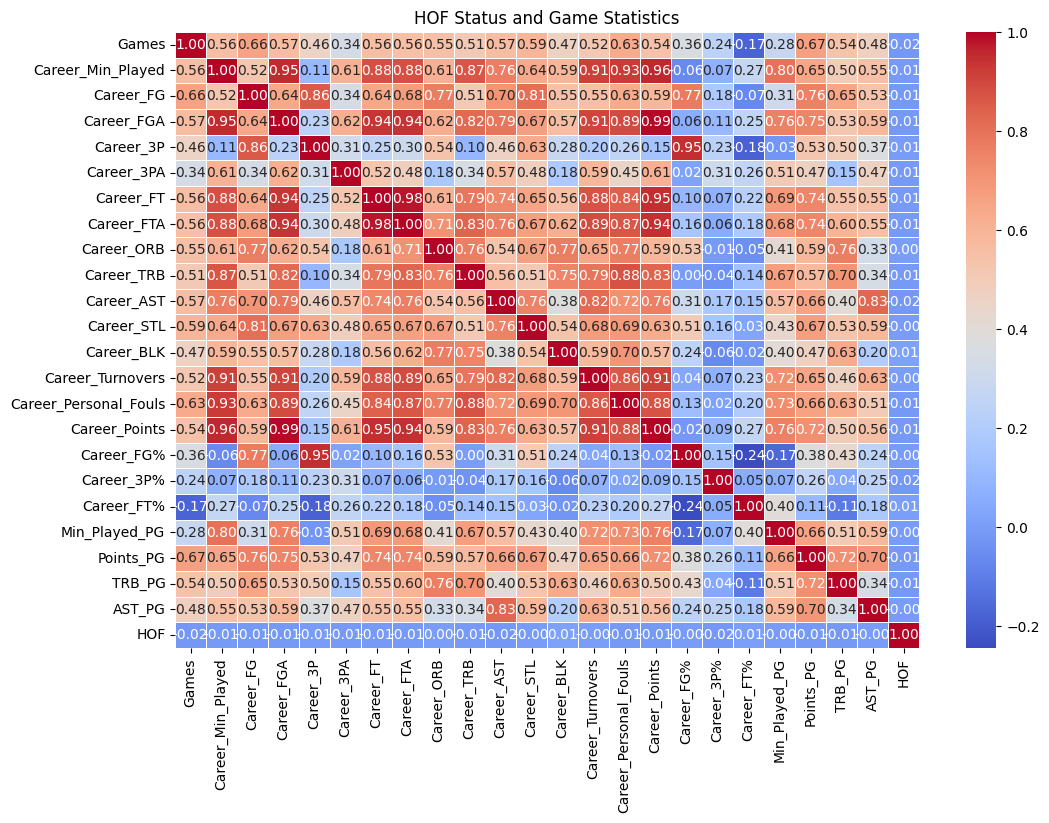

In [22]:
# Select only game stats
game_stats = ['Games', 'Career_Min_Played', 'Career_FG', 'Career_FGA', 'Career_3P',
              'Career_3PA', 'Career_FT', 'Career_FTA', 'Career_ORB', 'Career_TRB',
              'Career_AST', 'Career_STL', 'Career_BLK', 'Career_Turnovers',
              'Career_Personal_Fouls', 'Career_Points', 'Career_FG%', 'Career_3P%',
              'Career_FT%', 'Min_Played_PG', 'Points_PG', 'TRB_PG', 'AST_PG', 'HOF']

# Only include game stats
filtered_hsdf = hsdf[game_stats]

# Create corr matrix
correlation_matrix = filtered_hsdf.corr()

# Matplot
plt.figure(figsize=(12, 8))

# Use seaborn to create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("HOF Status and Game Statistics")
# Plot
plt.show()

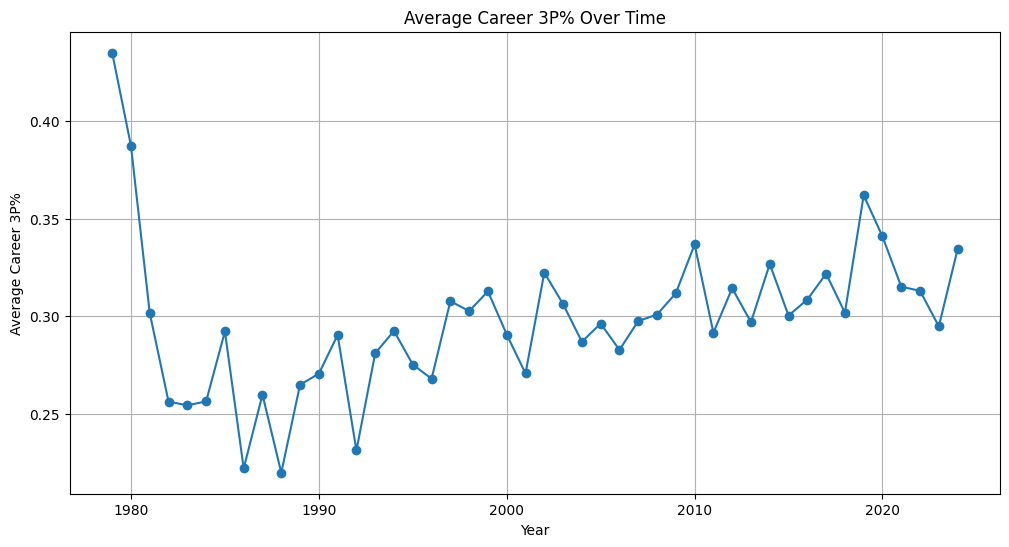

In [23]:
# 3-Point Percentage Over Time
avg_hsdf = hsdf[(hsdf['To'] >= 1979) & hsdf['Career_3P%']]

# Group by 'From' year and then calculate the average 'Career_3P%' for each group
avg_3p = avg_hsdf.groupby('To')['Career_3P%'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(avg_3p.index, avg_3p.values, marker='o', linestyle='-')
plt.title('Average Career 3P% Over Time')
plt.xlabel('Year')
plt.ylabel('Average Career 3P%')
plt.grid(True)
plt.show()

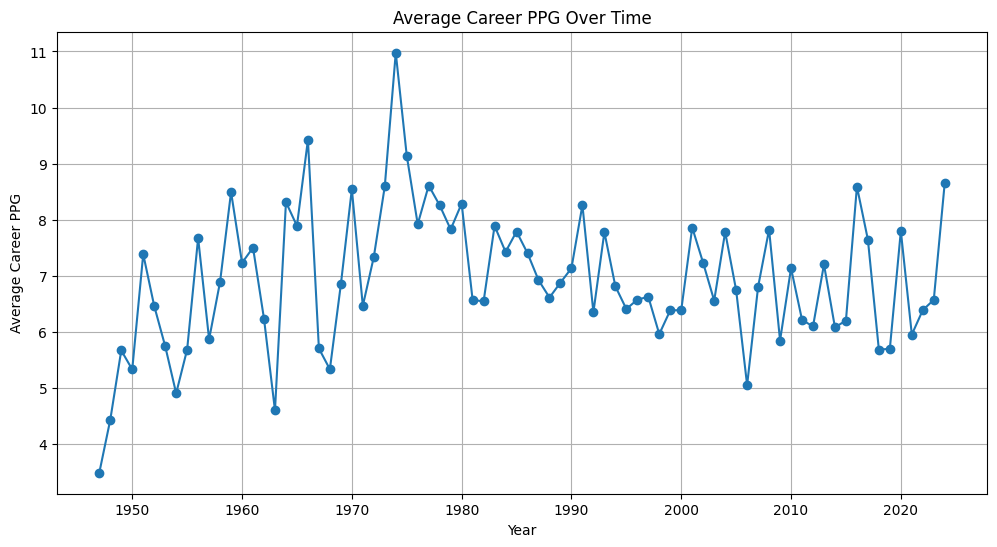

In [24]:
import matplotlib.pyplot as plt

# Filter players from the year 1900 and those averaging over 2 points per game
avg_hsdf = hsdf[(hsdf['To'] >= 1900) & (hsdf['Points_PG'])]

# Group by 'From' year and calculate the average 'Career_3P%' for each group
avg_ppg = avg_hsdf.groupby('To')['Points_PG'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(avg_ppg.index, avg_ppg.values, marker='o', linestyle='-')
plt.title('Average Career PPG Over Time')
plt.xlabel('Year')
plt.ylabel('Average Career PPG')
plt.grid(True)
plt.show()


## User Defined Functions ##

In [25]:
## Is a player in the hall of fame

# Clean/stripping whitespace from names - Removes whitespace before/after the text
hofdf['Name'] = hofdf['Name'].str.strip()

def check_hof_player():
    name = input("Enter a player's name to check if they are in the Hall of Fame: ")
    # Clean the input name - strips spaces again and make it case-insensitive
    name = name.strip()

    # Searches for a match without taking case sensitivity into account
    player = hofdf[hofdf['Name'].str.lower() == name.lower()]

    # If there is a match
    if not player.empty:
        for index, row in player.iterrows():
            print(
                f"Name: {row['Name']}\n Inductee_Type: {row['Inductee_Type']}\n Year: {row['Year']}\n "
                f"Points_PG: {row.get('Points_PG', 'N/A')}\n TRB_PG: {row.get('TRB_PG', 'N/A')}\n "
                f"AST_PG: {row.get('AST_PG', 'N/A')}\n STL_PG: {row.get('STL_PG', 'N/A')}\n "
                f"BLK_PG: {row.get('BLK_PG', 'N/A')}\n"
            )
    # If there is not a match
    else:
        print(f"{name} is not found in the Hall of Fame dataset.")
        
check_hof_player()

Enter a player's name to check if they are in the Hall of Fame:  Michael Jordan


Name: Michael Jordan
 Inductee_Type: Player
 Year: 2009
 Points_PG: 30.1
 TRB_PG: 6.2
 AST_PG: 5.3
 STL_PG: 2.3
 BLK_PG: 0.8



In [26]:
# Who are the top 5 players by 3P% for a given age in asdf?
def top_3P_percent():
    age = int(input("Enter the age: "))  # Age as input
    
    # Filter the dataframe age
    age_df = asdf[asdf['Age'] == age]
    if not age_df.empty:
        # Sort by x3p_Percent in descending order and get the top 5
        top_5 = age_df.sort_values(by='x3p_Percent', ascending=False).head(5)
    
        # Print the relevant columns (Player, Team_x, Age, x3p_Percent)
        print(top_5[['Player', 'Team_x', 'Age', 'x3p_Percent']])

    else:
        print("No all-stars at this age.")

top_3P_percent()

Enter the age:  22


                 Player                  Team_x   Age  x3p_Percent
580            Yao Ming         Houston Rockets  22.0        0.500
178  Karl-Anthony Towns  Minnesota Timberwolves  22.0        0.421
372          Kevin Love  Minnesota Timberwolves  22.0        0.417
253        Kyrie Irving     Cleveland Cavaliers  22.0        0.415
33    Tyrese Haliburton          Indiana Pacers  22.0        0.400


In [27]:
# Player Comparison - Calculates the difference in specific stats.

# Clean/stripping whitespace from names - Removes whitespace before/after the text
hsdf['Player'] = hsdf['Player'].str.replace('*', '', regex=False).str.strip().str.lower()

def player_stat_difference():
    
    # Input names
    player1 = input("Enter the name of the first player: ").strip().lower()
    player2 = input("Enter the name of the second player: ").strip().lower()

    # Filter to players
    player1_data = hsdf[hsdf['Player'] == player1]
    player2_data = hsdf[hsdf['Player'] == player2]

    # Check if in hsdf
    if player1_data.empty or player2_data.empty:
        return "One or both players are not in dataset."

    # Get the relevant stats
    stats = ['Points_PG', 'TRB_PG', 'AST_PG', 'Min_Played_PG', 'Years']
    player1_stats = player1_data[stats].iloc[0]
    player2_stats = player2_data[stats].iloc[0]

    # Find the difference between the two
    differences = {stat: player1_stats[stat] - player2_stats[stat] for stat in stats}

    # Format the print to address relationship
    for stat, diff in differences.items():
        if stat == 'Years':
            print(f"{player1.title()} played {abs(diff)} {'more' if diff > 0 else 'less'} years than {player2.title()}.")
        else:
            stat_name = stat.replace('_PG', '').lower()
            direction = "more" if diff > 0 else "less"
            print(f"{player1.title()} averages {abs(diff):.2f} {direction} {stat_name} per game than {player2.title()}.")

player_stat_difference()

Enter the name of the first player:  Michael Jordan
Enter the name of the second player:  LeBron James


Michael Jordan averages 3.00 more points per game than Lebron James.
Michael Jordan averages 1.30 less trb per game than Lebron James.
Michael Jordan averages 2.10 less ast per game than Lebron James.
Michael Jordan averages 0.40 more min_played per game than Lebron James.
Michael Jordan played 6.0 less years than Lebron James.


## Stat Comparisons ##

In [28]:
# Remove extra spaces and lowercase to match
hofdf['Name'] = hofdf['Name'].str.strip().str.lower()
hsdf['Player'] = hsdf['Player'].str.strip().str.lower()

# Add Min_Played_PG and Years
hof = pd.merge(hofdf, hsdf[['Player', 'Min_Played_PG', 'Years']], 
                     how='left', left_on='Name', right_on='Player')
# Drop the 'Player' column
hof.drop(columns=['Player'], inplace=True)

# Change from series to string and capitalize the first letter of first/last names
hof['Name'] = hof['Name'].str.title()

hof.head()

,Year,Name,Contribution_Type,Inductee_Type,Games,Points_PG,TRB_PG,AST_PG,STL_PG,BLK_PG,FG%,3P%,FT%,Games_Coached,Wins_Coached,Losses_Coached,Win_Loss,Win_Loss_Ratio,Min_Played_PG,Years
0,2024,Seimone Augustus,WNBA / Int'l / CBB player,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,Dick Barnett,Player / Coach,Player,971.0,15.8,2.9,2.8,0.2,0.0,0.456,NaN,0.761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,Chauncey Billups,Player / Coach / Int'l / CBB player,Player,1043.0,15.2,2.9,5.4,1.0,0.2,0.415,0.387,0.894,NaN,NaN,NaN,NaN,NaN,31.6,17.0
3,2024,Vince Carter,Player / Int'l / CBB player,Player,1541.0,16.7,4.3,3.1,1.0,0.6,0.435,0.371,0.798,NaN,NaN,NaN,NaN,NaN,30.1,22.0
4,2024,Doug Collins,Player / Coach / Exec / Int'l / CBB player,Contributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.6,8.0


In [29]:
# HOF Stat Lines
stats = ['Points_PG', 'TRB_PG', 'AST_PG', 'Min_Played_PG', 'Years']
hof[stats].mean()

Points_PG        17.761350
TRB_PG            7.336420
AST_PG            3.762577
Min_Played_PG    29.891882
Years            11.756098
dtype: float64

In [30]:
# All-Star Stat Lines
stats = ['Points', 'TRB', 'AST', 'Minutes_Played', 'Years_Exp']
asdf[stats].mean()

Points            20.889598
TRB                7.868630
AST                4.413539
Minutes_Played    36.328102
Years_Exp          6.839296
dtype: float64

In [31]:
# All NBA Stat Lines
stats = ['Points_PG', 'TRB_PG', 'AST_PG', 'Min_Played_PG', 'Years']
hsdf[stats].mean()

Points_PG         6.993977
TRB_PG            3.195592
AST_PG            1.522689
Min_Played_PG    16.234755
Years             5.184234
dtype: float64

In [32]:
# Stat Lines By All-Star Conference
stats = ['Points', 'TRB', 'AST', 'Minutes_Played', 'Years_Exp']

avg_east = asdf[asdf['Conference'] == 'East'][stats].mean()
avg_west = asdf[asdf['Conference'] == 'West'][stats].mean()
print(f"East:\n{avg_east}\n\nWest:\n{avg_west}\n\n")

East:
Points            20.549451
TRB                7.867473
AST                4.332527
Minutes_Played    36.364111
Years_Exp          6.915385
dtype: float64

West:
Points            21.230871
TRB                7.869791
AST                4.494818
Minutes_Played    36.291973
Years_Exp          6.762955
dtype: float64




------------------------------------------------------------------------------------------------------------------------------

## Analysis and Evidence-Based Answers

With the data prepared and organized, we proceeded to analyze the questions outlined earlier. Below is a summary of our findings:

1. **Statistical Trends in the NBA:**
   Over the years, there has been a clear shift in the NBA towards higher three-point shooting. Teams are increasingly relying on the three-point shot as part of their offensive strategy. However, while three-point shooting has become more efficient, players aren't scoring averaging higher PPG. This is likely a result of the increased pace of play and larger player rotations compared to the early years of the NBA.

2. **Correlation Between Metrics and Success:**
   Our analysis showed that while stats like points per game and rebounds per game are still important to modern success, there is not much correlation to hall of fame nomination. This tells us that you have to truly be the best of the best to make it in. Our 'success level' comparison also hints that many players that are all-star nominees have stats well enough to be a hall of fame nominee.

3. **Coaches, Referees, and More:**
   Success in the NBA takes many forms, extending far beyond the players on the court. A deep understanding of the game can pave the way for impactful contributions, allowing coaches, referees, and others to achieve greatness and even reach the hall of fame without ever actually playing.

## Final Discussion and Conclusion

In conclusion, success in the NBA is can be found in a variety of different measures given the era, contribution type, and 
much more. Advanced analytics have become much more crucial in understanding player performance and keeping up with the evolution of the sport. This continued use of analytics in the sports market will likely influence how the game of basketball evolves next.

## Obstacles Encountered and How They Were Resolved

During this project, we encountered several challenges:

- **Data Cleaning Issues:**  
   We had to fix missing values and inconsistent entries, and variations in attribute names among data sets. These were handled by removing rows with incomplete data and standardizing formats.
   
- **Merging Datasets:**  
   The inconsistencies mentioned before made it difficult to combine some data sets, thus making it harder to compare. 'Years' gave us the biggest problem since it was entered as 'yyyy-yyyy' rather than a simple quantitative variable.

Despite these bumps in the road, we were able to clean the data, address inconsistencies, and carry out our plan to derive insights into what defines success in the NBA.